$$ \Huge \text{Forecasting COVID deaths in NC}$$ 

# Covid Data


    
__NC DHHS__

https://covid19.ncdhhs.gov/dashboard/about-data    
    
   


## Pandas

# I'll be using [Pandas](https://pandas.pydata.org/) to load in my data. 
    

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

reg=linear_model.LinearRegression() # Constructing SKlearn model

In [2]:
# Reading in the data with Pandas
nccovid=pd.read_csv('NCcovid.csv')
nccovid.head()

,Date,New Cases by Report Date,New Cases by Specimen Date,Positive Test Percentage,NC Daily Tests,NC Deaths
0,9/22/2020,"1,168",NaN,NaN,NaN,3286.0
1,9/21/2020,800,30,NaN,"14,029",3247.0
2,9/20/2020,"1,333",260,5.40%,"22,476",3243.0
3,9/19/2020,"1,229",451,5.30%,"25,953",3235.0
4,9/18/2020,"1,443","1,082",4.60%,"34,307",3207.0


In [3]:
date=nccovid['Date']
y=nccovid['NC Deaths']
date.shape # 182 days of data 

(182,)

In [4]:
# Reshpaing the data 
x=np.linspace(182,1,182)
x=np.reshape(x,(182,1))
y=np.array(y)
y=np.reshape(y,(182,1))

# Simple Linear Regression

# This model takes the form  $h(x)=a+b x$ 

In [5]:
reg.fit(x,y) # fitting model
a=reg.intercept_[0]
b=reg.coef_[0][0]

print(a,b)

-319.41485034302696 18.33540519800822



<font size =4> Plotting the data with the model's prediction

Text(0, 0.5, 'Deaths')

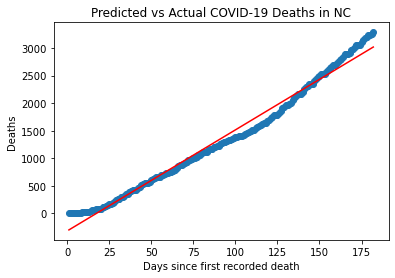

In [6]:
plt.plot(x, a + b*x, "r") # Simple linear regression

plt.scatter(x,y)

plt.title('Predicted vs Actual COVID-19 Deaths in NC')
plt.xlabel('Days since first recorded death')
plt.ylabel('Deaths')

In [7]:
deathsByElection = (b*(182+40)) + a 
print("Predicted number of deaths on Nov. 3rd:",int(deathsByElection)) # Not very accurate

Predicted number of deaths on Nov. 3rd: 3751


<font size=4 color =darkblue> Predicting number of deaths 41 days from today (9-23-2020) on Nov. 3rd

<font color=red> => 3751 Deaths Predicted (not very accurate)

#  2nd Order Polynomial Regression

# This model takes the form  $h(x)=a+bx+c x^2$ 

In [8]:
poly_f=PolynomialFeatures(degree=2,include_bias=False) # Instantiating quadratic term

X_poly=poly_f.fit_transform(x) # Applying quadratic transformation

reg.fit(X_poly,y) # fitting data to new model

a=reg.intercept_[0]
b=reg.coef_[0][0]
c=reg.coef_[0][1]

print("a (Intercept term) =",a)
print("b (Coefficient 1) =",b)
print("c (Coefficient 2) =",c)

a (Intercept term) = -55.43017019812578
b (Coefficient 1) = 9.727209106326665
c (Coefficient 2) = 0.047039322905363695



# Plotting the data with the model's prediction

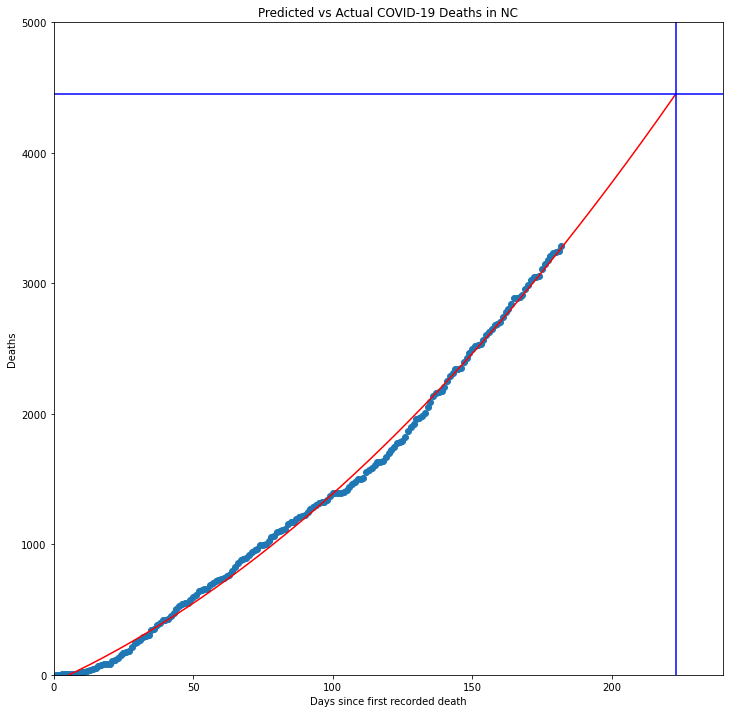

In [9]:
plt.figure(figsize=(12,12))

plt.scatter(x,y)
x=np.linspace(223,1,223)
x=np.reshape(x,(223,1))

plt.xlim(0, 240)
plt.ylim(0,5000)

plt.plot(x, a + b*x+c*np.power(x,2), "r")

plt.title('Predicted vs Actual COVID-19 Deaths in NC')
plt.xlabel('Days since first recorded death')
plt.ylabel('Deaths')

plt.axvline(x=182+41,color='b') # Blue vertical line corresponds with date of election
plt.axhline(y=a + b*(182+41) + c*(182+41)**2,color='b') 

In [10]:
deathsByElection = a + b*(182+41) + c*(182+41)**2

print("Predicted number of deaths on Nov. 3rd:",int(deathsByElection))

Predicted number of deaths on Nov. 3rd: 4452


<font size=4 color =darkblue> Predicting number of deaths 41 days from today (9-23-2020) on Nov. 3rd

<font color=red> => 4452 Deaths Predicted

# The acutal number of deaths on Nov. 3rd came out to 4,457 ; an unfortunately accurate forecast and an underestimation at that. . . 

#  Time to update the model with current information

In [11]:
# Loading in most recent data updated as of today Nov. 3rd
#update with NCcovidNew#############
NCcovidNew=pd.read_excel('NCcovidNew.xlsx', sheet_name='Sheet 1')
NCcovidNew.head()

,Date,Cases by Report Date,Molecular (PCR) Positive Cases by Specimen Date,Antigen Positive Cases by Specimen Date,NC Deaths
0,11/3/2020,2349,NaN,NaN,4457
1,11/2/2020,1336,26.0,49.0,4390
2,11/1/2020,2057,359.0,54.0,4383
3,10/31/2020,2805,591.0,77.0,4378
4,10/30/2020,2809,1786.0,130.0,4332


In [12]:
date = NCcovidNew['Date']
y = NCcovidNew['NC Deaths']
date.shape # 224 days of data 

(224,)

In [13]:
# Reshpaing the data 
x=np.linspace(224,1,224)
x=np.reshape(x,(224,1))
y=np.array(y)
y=np.reshape(y,(224,1))

# Using 2nd order Polynomial Regression once again

In [14]:
poly_f=PolynomialFeatures(degree=2,include_bias=False) # Instantiating quadratic term

X_poly=poly_f.fit_transform(x) # Applying quadratic transformation

reg.fit(X_poly,y) # fitting data to new model

a=reg.intercept_[0]
b=reg.coef_[0][0]
c=reg.coef_[0][1]

print("a (Intercept term) =",a)
print("b (Coefficient 1) =",b)
print("c (Coefficient 2) =",c)

a (Intercept term) = -64.88491059525245
b (Coefficient 1) = 10.06007469864205
c (Coefficient 2) = 0.04522201123331129


# Plotting the data with the model's forecast

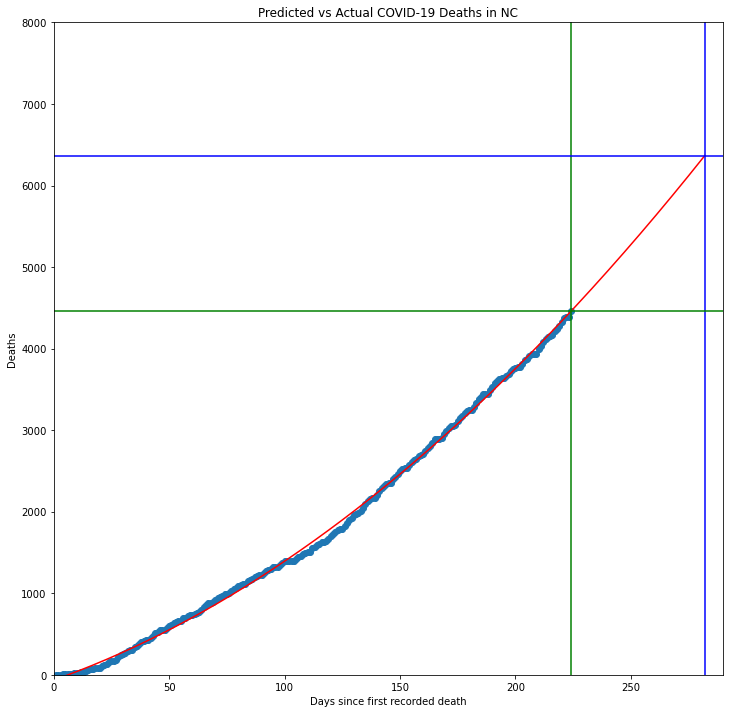

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(x,y)

x=np.linspace(282,1,282)
x=np.reshape(x,(282,1))
plt.xlim(0, 290)
plt.ylim(0,8000)

plt.plot(x, a + b*x+c*np.power(x,2), "r")

plt.title('Predicted vs Actual COVID-19 Deaths in NC')
plt.xlabel('Days since first recorded death')
plt.ylabel('Deaths')

plt.axvline(x=224+58,color='b') # Blue vertical line corresponds with Dec. 31st
plt.axvline(x=224,color='g') # Blue vertical line corresponds with Dec. 31st
plt.axhline(y=a + b*(224+58) + c*(224+58)**2,color='b') 
plt.axhline(y=a + b*(224) + c*(224)**2,color='g') # Corresponds with today's death total of 4,457

In [16]:
deathsByNewYears = a + b*(224+58) + c*(224+58)**2 # Forecasting 58 days into the future

print("Predicted number of deaths on Dec. 31st:",int(deathsByNewYears))

Predicted number of deaths on Dec. 31st: 6368


<font size=4 color =darkblue> Predicting number of deaths 58 days from today (11-3-2020) on Dec. 31st

<font color=red> => 6368 Deaths Predicted